In [5]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# aaa
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [6]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [7]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [8]:
config_file = "../configs/text/e2e_faster_rcnn_X_101_32x8d_FPN_quick_epoch6.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [18]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.4,
)

In [19]:
img_path = '/workspace/coco_style_all_data/images/val/1520750850777.png'
pil_image = Image.open(img_path).convert("RGB")
image = np.array(pil_image)[:, :, [2, 1, 0]]

In [20]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

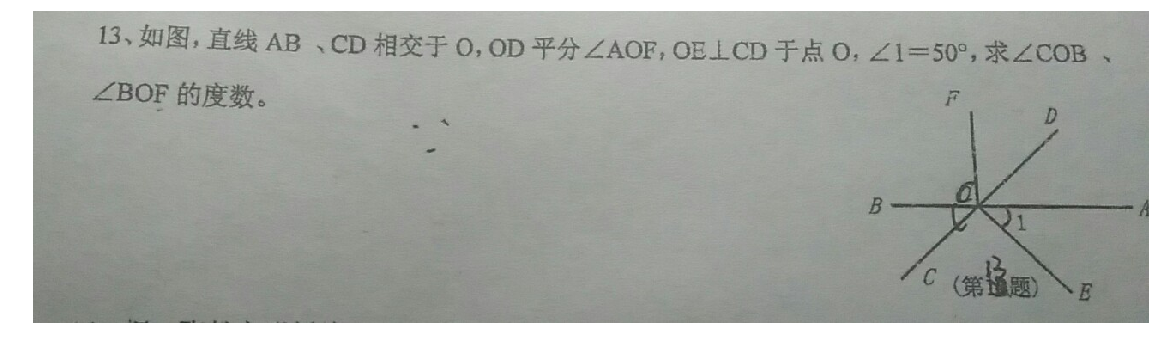

In [21]:
imshow(image)

In [22]:
predictions = coco_demo.run_on_opencv_image(image)

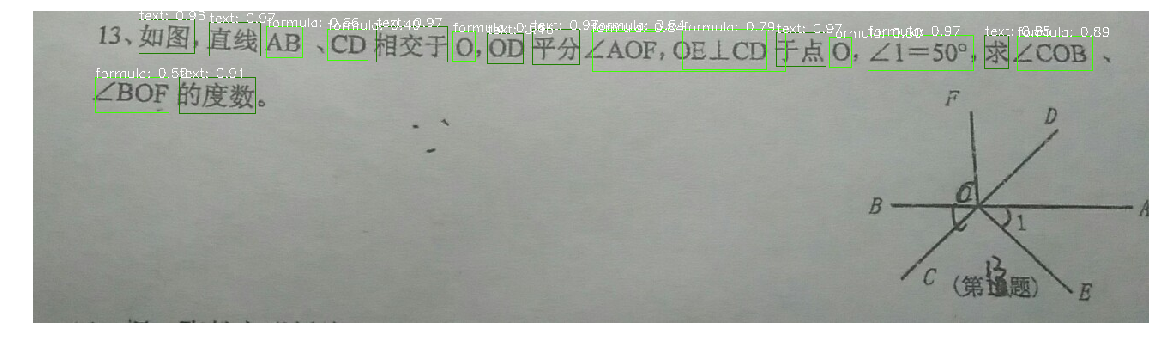

In [23]:
imshow(predictions)

In [24]:
predictions = coco_demo.compute_prediction(image)
top_predictions = coco_demo.select_top_predictions(predictions)

In [25]:
top_predictions.bbox

tensor([[ 400.1760,   19.7589,  483.1593,   60.7283],
        [ 866.7114,   26.2128,  924.0646,   65.8302],
        [ 205.2304,   14.9190,  265.7029,   53.1187],
        [ 973.1026,   29.2520, 1096.9984,   70.0380],
        [ 582.8056,   22.0408,  637.3102,   63.9202],
        [ 123.9446,   11.4127,  188.1183,   50.9866],
        [ 170.4683,   78.9199,  259.9898,  120.0206],
        [1147.4633,   30.8502, 1235.9608,   70.7375],
        [1109.1763,   29.5481, 1137.2112,   68.0951],
        [ 650.0682,   25.8761,  734.6292,   67.2378],
        [ 757.3014,   24.8692,  855.0980,   69.5994],
        [ 272.5403,   19.8833,  314.8386,   55.9934],
        [ 489.4886,   25.3552,  515.8624,   59.5871],
        [ 652.8264,   22.8870,  877.1674,   71.7992],
        [  72.2225,   78.0212,  158.3339,  119.8123],
        [ 928.2676,   31.3985,  954.5455,   66.0068],
        [ 529.8880,   27.3909,  571.3596,   62.9931],
        [ 343.1826,   22.5707,  390.2115,   58.1791]])

In [26]:
top_predictions.extra_fields

{'labels': tensor([1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2]),
 'scores': tensor([0.9720, 0.9696, 0.9669, 0.9664, 0.9651, 0.9612, 0.9088, 0.8907, 0.8462,
         0.8445, 0.7854, 0.6647, 0.6595, 0.5371, 0.5155, 0.5012, 0.4605, 0.4010])}